In [67]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import tensorflow_hub as hub

In [68]:
# Function to load and preprocess images
def load_image(image_path, max_dim=512):
    img = Image.open(image_path)
    img = img.convert('RGB')
    img = np.array(img)

    # Resize image if it is too large
    max_dim = float(max_dim)
    scale = max_dim / max(img.shape[0], img.shape[1])
    new_shape = np.array(img.shape) * scale
    new_shape = new_shape.astype(int)
    img = Image.fromarray(img)
    img = img.resize((new_shape[1], new_shape[0]), Image.LANCZOS)

    img = np.array(img)
    img = np.expand_dims(img, axis=0)  # Add batch dimension
    img = tf.image.convert_image_dtype(img, dtype=tf.float32)

    return img

In [69]:
# Function to deprocess image (convert back to uint8)
def deprocess_image(processed_img):
    processed_img = processed_img.numpy()
    processed_img = np.squeeze(processed_img, axis=0)
    processed_img = processed_img * 255
    processed_img = np.clip(processed_img, 0, 255).astype('uint8')

    return processed_img

In [70]:
# Function to display image
def display_image(image):
    plt.figure(figsize=(10, 10))
    plt.imshow(image)
    plt.axis('off')
    plt.show()

In [71]:
# Load content and style images
content_path = 'base.jpg'  # Update path
style_path = 'style.jpg'  # Update path

In [72]:
content_image = load_image(content_path)
style_image = load_image(style_path)

In [73]:
hub_module = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')

In [74]:
stylized_image = hub_module(content_image, style_image)[0]

In [75]:
final_img = deprocess_image(stylized_image)

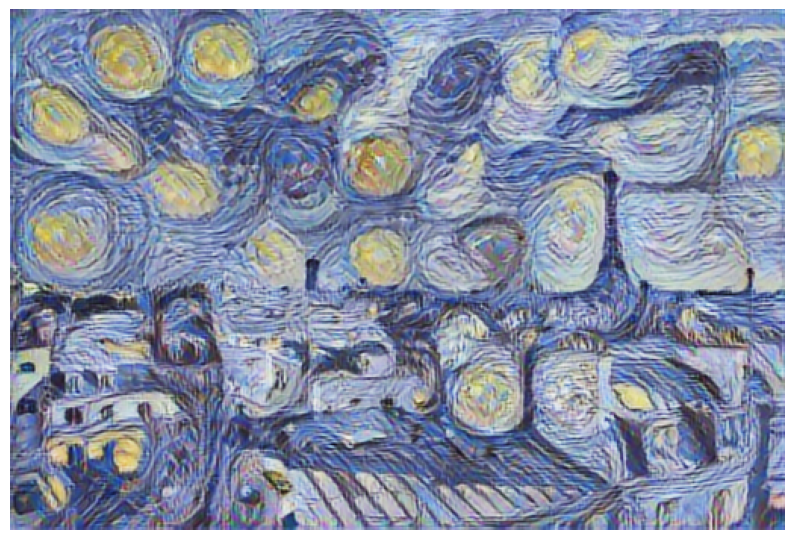

In [76]:
display_image(final_img)